# Import module

In [3]:
#### Set to 1 if you want to perform hyperparmeter learning #####
hyper_para_learn = 0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import jaconv
import re
import pickle as pkl

# Change fontype of pyplot
import matplotlib.font_manager
#print([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = 'MS Gothic'
# For mac user
#plt.rcParams['font.family'] = 'AppleGothic'

# Load Data

In [6]:
df = pd.read_csv("SuperD_Class2_tochi_sample.csv")

In [7]:
# load code data
df_code = pd.read_csv("SuperD_Class2_shicyoukuson_code_utf8.csv")
# create dict
code2lng, code2lat = ({} for _ in range(2))
for i in range(len(df_code)):
    code = str(df_code["コード"].iloc[i])
    if (len(code) == 5):
        code = code[0:4]
    else:
        code = code[0:5]
    code2lng.update({int(code): df_code["経度"].iloc[i]})
    code2lat.update({int(code): df_code["緯度"].iloc[i]})
# longitude and latitude
df["longitude"] = df["市区町村コード"].map(code2lng)
df["latitude"] = df["市区町村コード"].map(code2lat)

# Price distribution

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

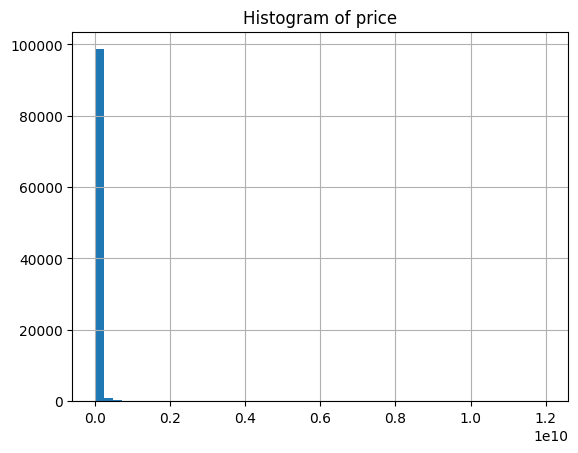

In [8]:
# too heavy tailed
df["取引価格（総額）"].hist(bins=50)
plt.title("Histogram of price")
plt.show()

In [9]:
# summary statistics
df["取引価格（総額）"].describe()

count    1.000000e+05
mean     3.331154e+07
std      1.312907e+08
min      1.000000e+02
25%      7.100000e+06
50%      1.700000e+07
75%      3.400000e+07
max      1.200000e+10
Name: 取引価格（総額）, dtype: float64

In [10]:
# sort
df.sort_values(by="取引価格（総額）",ascending=False,inplace=True)

In [11]:
# overview
df.head()

,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時期,取引の事情等,longitude,latitude
75540,宅地(土地と建物),不動産取引価格情報,商業地,13101,東京都,千代田区,二番町,麹町,3,12000000000,...,北西,区道,8.2,２種住居,NaN,NaN,2006年第3四半期,NaN,139.753595,35.694003
85112,宅地(土地と建物),不動産取引価格情報,工業地,40131,福岡県,福岡市東区,みなと香椎,香椎,30分～60分,11000000000,...,北西,道路,40.0,準工業,60.0,300.0,2017年第4四半期,NaN,130.417391,33.617746
38187,宅地(土地),不動産取引価格情報,住宅地,12227,千葉県,浦安市,明海,新浦安,15,9900000000,...,北東,市道,16.0,１低住専,50.0,100.0,2010年第2四半期,NaN,139.902203,35.653984
85913,宅地(土地),不動産取引価格情報,商業地,14103,神奈川県,横浜市西区,高島,横浜,6,8700000000,...,北,市道,30.0,商業,80.0,800.0,2018年第3四半期,NaN,139.616960,35.453623
33734,宅地(土地と建物),不動産取引価格情報,住宅地,27230,大阪府,交野市,私部西,交野市,2,8300000000,...,南東,市道,12.0,近隣商業,80.0,300.0,2012年第3四半期,NaN,135.679953,34.787944


In [12]:
# Restrict to Tokyo
cond = (df["都道府県名"] == "東京都")
df2 = df.loc[cond].copy()
df2.head()

,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時期,取引の事情等,longitude,latitude
75540,宅地(土地と建物),不動産取引価格情報,商業地,13101,東京都,千代田区,二番町,麹町,3,12000000000,...,北西,区道,8.2,２種住居,NaN,NaN,2006年第3四半期,NaN,139.753595,35.694003
42020,宅地(土地と建物),不動産取引価格情報,住宅地,13211,東京都,小平市,鈴木町,小平,7,8200000000,...,東,市道,6.0,１中住専,60.0,200.0,2014年第1四半期,NaN,139.477456,35.728577
20243,宅地(土地と建物),不動産取引価格情報,商業地,13109,東京都,品川区,西五反田,大崎広小路,3,7600000000,...,北西,都道,25.0,商業,80.0,700.0,2014年第1四半期,NaN,139.730186,35.609226
42668,宅地(土地と建物),不動産取引価格情報,住宅地,13113,東京都,渋谷区,神宮前,明治神宮前,9,5600000000,...,北,区道,14.5,２種住居,60.0,300.0,2010年第1四半期,NaN,139.704051,35.661777
71230,宅地(土地と建物),不動産取引価格情報,商業地,13103,東京都,港区,赤坂,赤坂見附,2,5000000000,...,北東,区道,11.0,商業,80.0,500.0,2020年第3四半期,NaN,139.751599,35.658068


In [13]:
# Take log price
df["log_price"] = np.log(df["取引価格（総額）"])

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

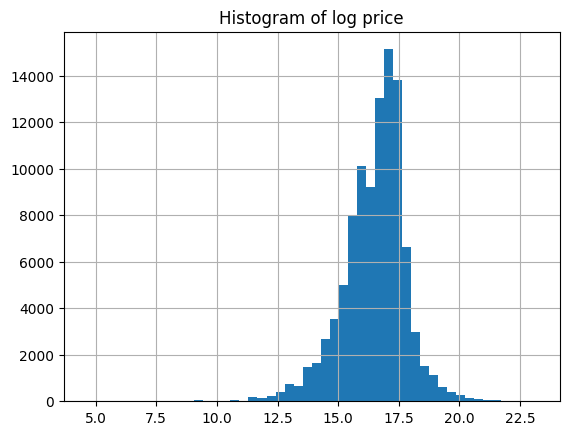

In [14]:
# Much better
df["log_price"].hist(bins=50)
plt.title("Histogram of log price")
plt.show()

In [15]:
# summary statistics
df["log_price"].describe()

count    100000.000000
mean         16.494449
std           1.305279
min           4.605170
25%          15.775605
50%          16.648724
75%          17.341871
max          23.208172
Name: log_price, dtype: float64

# Transaction date

In [16]:
# Check -> this is not ok
df["取引時期"].value_counts()

取引時期
2021年第2四半期    2110
2021年第3四半期    2060
2021年第4四半期    1970
2021年第1四半期    1867
2022年第4四半期    1857
              ... 
2006年第3四半期     396
2006年第2四半期     360
2005年第3四半期     219
2005年第4四半期     200
2006年第1四半期     189
Name: count, Length: 75, dtype: int64

In [17]:
# Create a dataframe
df_time = pd.DataFrame(df["取引時期"].value_counts())
# Find how many unique quarters in the data
print(set(df_time.index.str[6]))
# make a dictionary out of it for further use
quarterly_dict = {'1': 1, '2': 4, '3': 7, '4': 10}

{'2', '1', '3', '4'}


# Using jaconv

In [18]:
# Finally
transaction_date2date = {}
for i in range(len(df_time)):
    # the original str
    transaction_date = df_time.index[i]
    # year
    year_num = df_time.index[i][0:4]
    # quarterly to month
    month_num = quarterly_dict[df_time.index[i][6]]
    # transform to datetime format
    date = datetime.datetime.strptime(str(year_num) + str(month_num), "%Y%m")
    transaction_date2date.update({transaction_date: date})

In [19]:
# create longitude and latitude
df["date"] = df["取引時期"].map(transaction_date2date)

In [20]:
df["date"].head()

75540   2006-07-01
85112   2017-10-01
38187   2010-04-01
85913   2018-07-01
33734   2012-07-01
Name: date, dtype: datetime64[ns]

# Mean log price

In [21]:
# Know the difference: apply and transform
df["date_mean_log_price"] = df.groupby("date")["log_price"].transform(np.mean)

# apply
df_date = pd.DataFrame(df.groupby("date")["log_price"].apply(np.mean))

/var/folders/xx/46bbfzhs77j5z84b92fz834w0000gn/T/ipykernel_87927/3062294462.py:2: FutureWarning: The provided callable <function mean at 0x107fff560> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df["date_mean_log_price"] = df.groupby("date")["log_price"].transform(np.mean)


findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

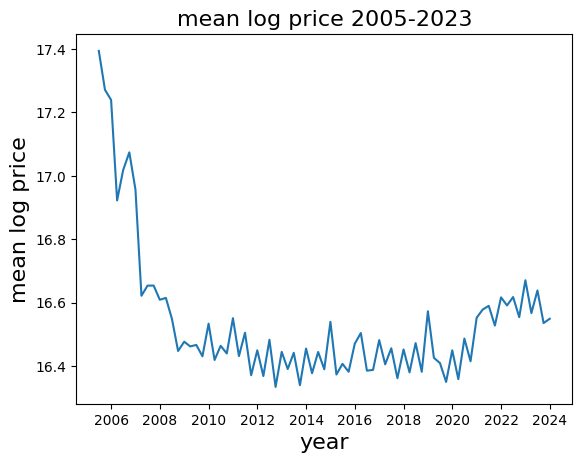

In [22]:
# Where did this seasonality come from?
plt.plot(df_date["log_price"])
plt.title("mean log price 2005-2023",size=16)
plt.xlabel("year",size=16)
plt.ylabel("mean log price",size=16)
plt.show()

# Area

In [23]:
# Check -> not okay
df["面積（㎡）"]

75540        1800
85112    2,000㎡以上
38187    2,000㎡以上
85913    2,000㎡以上
33734    2,000㎡以上
           ...   
21514         105
48726         350
6808          320
79979          85
17017         155
Name: 面積（㎡）, Length: 100000, dtype: object

In [24]:
# create a dataframe
df_area = pd.DataFrame(df["面積（㎡）"].value_counts())

# square_meters converter
square_meters2area = {}
for i in range(len(df_area)):
    square_meters = df_area.index[i]
    area = re.sub("㎡以上", "", square_meters)
    area = re.sub("m&sup2;以上", "", area)
    area = re.sub(",", "", area)
    area = int(area)
    square_meters2area.update({square_meters: area})

In [25]:
# do not use replace, map is faster
df["area"] = df["面積（㎡）"].map(square_meters2area)

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

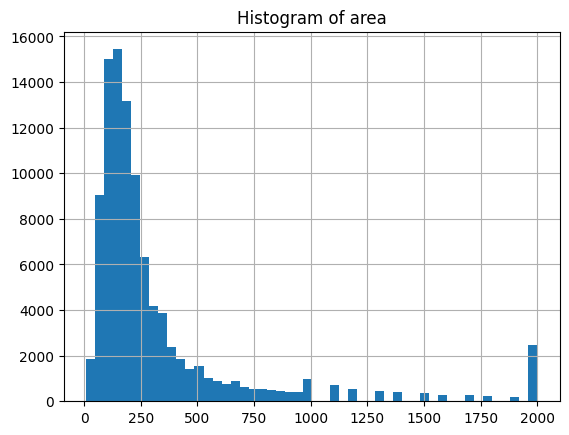

In [26]:
df["area"].hist(bins=50)
plt.title("Histogram of area")
plt.show()

# Type

In [27]:
type
# Check -> Seems Okay
df["種類"].value_counts()

種類
宅地(土地と建物)    54872
宅地(土地)       45128
Name: count, dtype: int64

In [28]:
# Create Dummies
# Note this could be only run once.
df = pd.get_dummies(df, columns=["種類"])

# Circumstances

In [29]:
# Check -> Interesting
df['取引の事情等'].value_counts()

取引の事情等
私道を含む取引            3479
調停・競売等             1848
隣地の購入               450
関係者間取引              320
調停・競売等、私道を含む取引       87
隣地の購入、私道を含む取引        25
その他事情有り              20
古屋付き・取壊し前提           12
隣地の購入、関係者間取引          6
関係者間取引、私道を含む取引        6
他の権利・負担付き             4
瑕疵有りの可能性              4
隣地の購入、調停・競売等          3
私道を含む取引、その他事情有り       1
関係者間取引、調停・競売等         1
Name: count, dtype: int64

In [30]:
# Create Dummies
df = pd.get_dummies(df, columns=['取引の事情等'])

# Create a feature dataframe and a target dataframe

In [31]:
df.columns

Index(['価格情報区分', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '取引価格（総額）', '坪単価', '面積（㎡）', '取引価格（㎡単価）', '土地の形状', '間口',
       '延床面積（㎡）', '建築年', '建物の構造', '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類',
       '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時期', 'longitude',
       'latitude', 'log_price', 'date', 'date_mean_log_price', 'area',
       '種類_宅地(土地)', '種類_宅地(土地と建物)', '取引の事情等_その他事情有り', '取引の事情等_他の権利・負担付き',
       '取引の事情等_古屋付き・取壊し前提', '取引の事情等_瑕疵有りの可能性', '取引の事情等_私道を含む取引',
       '取引の事情等_私道を含む取引、その他事情有り', '取引の事情等_調停・競売等', '取引の事情等_調停・競売等、私道を含む取引',
       '取引の事情等_関係者間取引', '取引の事情等_関係者間取引、私道を含む取引', '取引の事情等_関係者間取引、調停・競売等',
       '取引の事情等_隣地の購入', '取引の事情等_隣地の購入、私道を含む取引', '取引の事情等_隣地の購入、調停・競売等',
       '取引の事情等_隣地の購入、関係者間取引'],
      dtype='object')

# Sample 10,000 records to reduce computation time

In [32]:
df_sample = df.sample(10000,random_state=123)

# Create Features and Target

In [33]:
def extract_target_feature(df_sample):
    # NOTE: I simply copy and pasted the ones I needed
    df_x = df_sample[[
        "area", "longitude", "latitude",
        '種類_宅地(土地)', '種類_宅地(土地と建物)',
        '取引の事情等_その他事情有り',
        '取引の事情等_他の権利・負担付き', 
        '取引の事情等_古屋付き・取壊し前提', '取引の事情等_瑕疵有りの可能性',
        '取引の事情等_私道を含む取引', '取引の事情等_調停・競売等', '取引の事情等_私道を含む取引、その他事情有り',
         '取引の事情等_調停・競売等、私道を含む取引',
        '取引の事情等_関係者間取引', '取引の事情等_関係者間取引、私道を含む取引', '取引の事情等_隣地の購入',
         '取引の事情等_隣地の購入、私道を含む取引', 
        '取引の事情等_隣地の購入、調停・競売等',
        '取引の事情等_隣地の購入、関係者間取引'
    ]]
    # Target
    df_y = df_sample[["log_price"]]
    return df_y,df_x

In [34]:
df_y,df_x = extract_target_feature(df_sample)

# Save and Load

In [35]:
# write to csv
df_x.to_csv("land_price_x.csv", index=False)
df_y.to_csv("land_price_y.csv", index=False)

In [36]:
# save as pickle
with open('df_x.pickle', 'wb') as f:
    pkl.dump(df_x, f)
with open('df_y.pickle', 'wb') as f:
    pkl.dump(df_y, f)

In [37]:
# load pickle
with open('df_x.pickle', 'rb') as f:
    df_x = pkl.load(f)
with open('df_y.pickle', 'rb') as f:
    df_y = pkl.load(f)

# Learning

In [38]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

# Random Split

In [39]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df_x.values,df_y.values,
                                                    test_size=0.6,random_state=123)

# train dev test
#x_train, x_dev_test, y_train, y_dev_test = train_test_split(df_x.values,df_y.values,test_size=0.6)
# dev test split
#x_dev, x_test, y_dev, y_test = train_test_split(x_dev_test,y_dev_test,test_size=0.5)

In [40]:
y_train

array([[16.10804532],
       [17.11134742],
       [15.06827353],
       ...,
       [16.01273514],
       [16.30041721],
       [18.19753719]])

In [41]:
y_train = np.reshape(y_train, [-1])
y_test  = np.reshape(y_test, [-1])
#y_dev   = np.reshape(y_dev, [-1])

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

In [42]:
x_train.shape

(4000, 19)

In [43]:
y_train.shape

(4000,)

# Linear Regression

In [44]:
# stats model
reg_linear = sm.OLS(y_train, x_train)
result = reg_linear.fit()
# prediction
y_test_linear = result.predict(x_test)

In [45]:
# Test Error
print(mean_squared_error(y_test_linear, y_test))

1.3820231566339387


In [46]:
# OLS
result.summary()

/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     77.33
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          4.40e-171
Time:                        22:48:48   Log-Likelihood:                -6247.8
No. Observations:                4000   AIC:                         1.252e+04
Df Residuals:                    3987   BIC:                         1.260e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007   4.96e-05     13.248      0.000       0.001       0.001
x2             0.1123      0.008     13.327      0.000       0.096       0.129
x3            -0.1844      0.012    -15.610      0.000      -0.208      -0.161
x4             7.0086      0.887      7.902      0.000       5.270       8.747
x5             7.8826      0.888      8.877      0.000       6.142       9.624
x6            -6.5004      1.157     -5.619      0.000      -8.768      -4.233
const       6.174e-16    3.1e-16      1.991      0.047    9.35e-18    1.23e-15
x7            -2.1623      1.159     -1.865      0.062      -4.436       0.111
x8         -1.837e-15   2.47e-16     -7.446      0.000   -2.32e-15   -1.35e-15
x9             0.1013      0.105      0.968      0.333      -0.104       0.306
x10           -0.8339      0.139     -6.002      0.000      -1.106      -0.561
x11         1.329e-15    1.6e-16      8.322      0.000    1.02e-15    1.64e-15
x12            0.3428      0.818      0.419      0.675      -1.260       1.946
x13            0.3848      0.366      1.051      0.293      -0.333       1.102
x14                 0          0        nan        nan           0           0
x15           -0.4034      0.266     -1.514      0.130      -0.926       0.119
x16           -0.1273      0.579     -0.220      0.826      -1.262       1.007
x17                 0          0        nan        nan           0           0
x18                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      668.786   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2085.663
Skew:                          -0.855   Prob(JB):                         0.00
Kurtosis:                       6.097   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'true')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

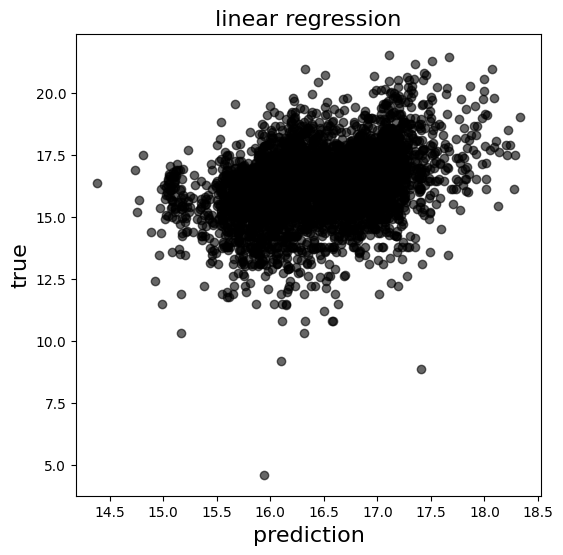

In [47]:
plt.figure(figsize=(6,6))
plt.plot(y_test_linear,y_test,marker="o",linestyle="",alpha=0.6,color="black")
plt.title("linear regression",size=16)
plt.xlabel("prediction",size=16)
plt.ylabel("true",size=16)

In [48]:
# If you insist on using scikit here you go
#reg_linear = linear_model.LinearRegression()
#reg_linear.fit(x_train, y_train)
# prediction
#y_test_linear = reg_linear.predict(x_test)
#mean_squared_error(y_test_linear, y_test)

# Random forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [50]:
%%time
# Hyper Parameter Learning
if hyper_para_learn == 1:
    reg_rf_cv = GridSearchCV(reg_rf, {
        'max_depth': [2, 6, 10],
        'n_estimators': [100, 1000, 5000],
        'max_features': ['log2'],
        'n_jobs': [24]
    },
                             verbose=1)
    reg_rf_cv.fit(x_train, y_train)
    print(reg_rf_cv.best_params_)
    print(reg_rf_cv.best_score_)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 11 μs


In [51]:
# n_jobs should be adjusted to your computing environment
# in the server do not overuse computational resources
reg_rf = RandomForestRegressor(max_depth=10,
                               max_features='log2',
                               n_estimators=5000,
                               n_jobs=24)
reg_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=5000,
                      n_jobs=24)

In [52]:
# Prediction
y_test_rf = reg_rf.predict(x_test)

In [53]:
# Test error
mean_squared_error(y_test_rf, y_test)

np.float64(1.0873684828045986)

Text(0, 0.5, 'true')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

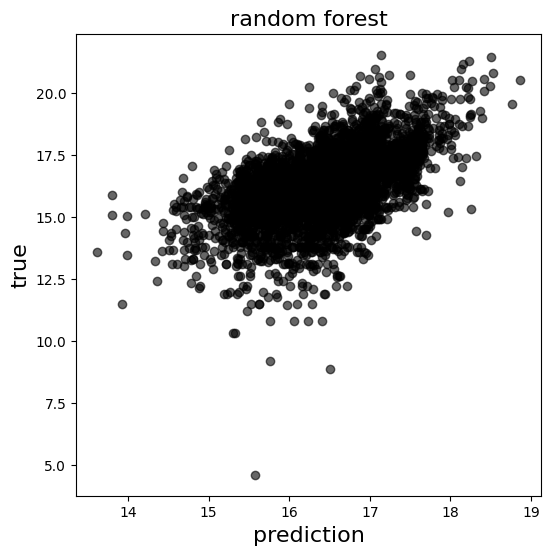

In [54]:
plt.figure(figsize=(6,6))
plt.plot(y_test_rf,y_test,marker="o",linestyle="",alpha=0.6,color="black")
plt.title("random forest",size=16)
plt.xlabel("prediction",size=16)
plt.ylabel("true",size=16)

In [55]:
df_x.columns

Index(['area', 'longitude', 'latitude', '種類_宅地(土地)', '種類_宅地(土地と建物)',
       '取引の事情等_その他事情有り', '取引の事情等_他の権利・負担付き', '取引の事情等_古屋付き・取壊し前提',
       '取引の事情等_瑕疵有りの可能性', '取引の事情等_私道を含む取引', '取引の事情等_調停・競売等',
       '取引の事情等_私道を含む取引、その他事情有り', '取引の事情等_調停・競売等、私道を含む取引', '取引の事情等_関係者間取引',
       '取引の事情等_関係者間取引、私道を含む取引', '取引の事情等_隣地の購入', '取引の事情等_隣地の購入、私道を含む取引',
       '取引の事情等_隣地の購入、調停・競売等', '取引の事情等_隣地の購入、関係者間取引'],
      dtype='object')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

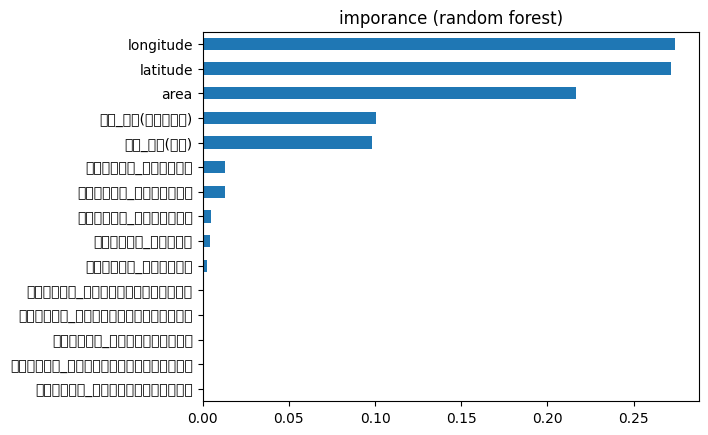

In [56]:
# Importance
importances = pd.Series(reg_rf.feature_importances_, index=df_x.columns)
importances = importances.sort_values()
importances[-15:].plot(kind="barh")
plt.title("imporance (random forest)")
plt.show()

# Gradient Boosting

In [57]:
!pip install xgboost

In [62]:
import xgboost as xgb
reg_xgb = xgb.XGBRegressor()

In [59]:
%%time
# Hyper Parameter Learning
if hyper_para_learn == 1:
    reg_xgb_cv = GridSearchCV(reg_xgb, {
        'max_depth': [2, 4, 6],
        'n_estimators': [50, 100, 500, 1000],
        'n_jobs': [24]
    },
                              verbose=1)
    reg_xgb_cv.fit(x_train, y_train)
    print(reg_xgb_cv.best_params_)
    print(reg_xgb_cv.best_score_)

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 3.81 μs


In [63]:
# Set Parameters
reg_xgb = xgb.XGBRegressor(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=4,
                           n_jobs=24)

In [65]:
# Fit
reg_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=24,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
# prediction
y_test_xgb = reg_xgb.predict(x_test)

In [67]:
# Test error
mean_squared_error(y_test_xgb, y_test)

np.float64(0.9689829017235443)

# Scatter plot: real vs predicted value

Text(0, 0.5, 'true')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.


findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

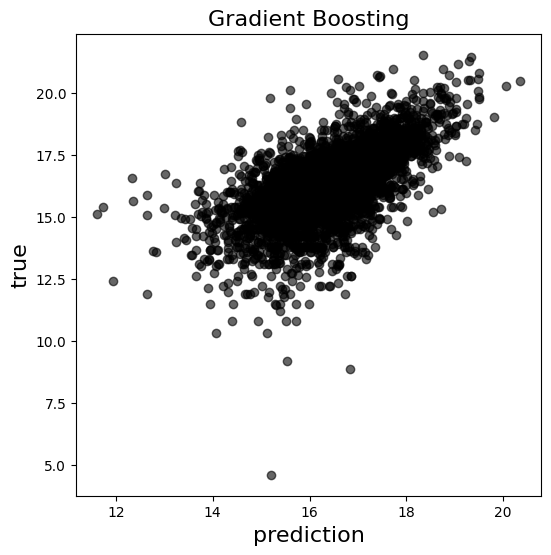

In [68]:
plt.figure(figsize=(6,6))
plt.plot(y_test_xgb,y_test,marker="o",linestyle="",alpha=0.6,color="black")
plt.title("Gradient Boosting",size=16)
plt.xlabel("prediction",size=16)
plt.ylabel("true",size=16)

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

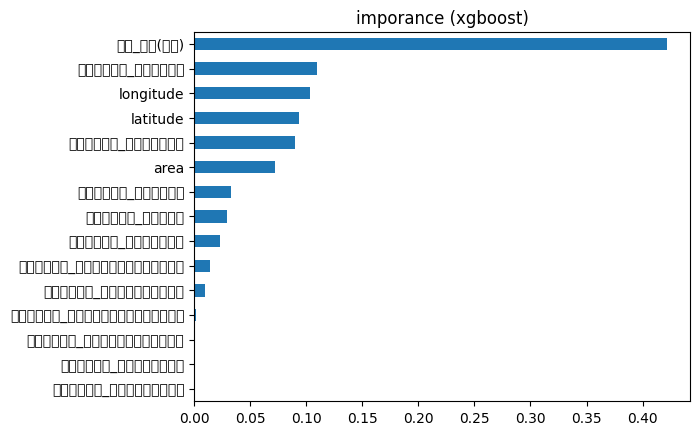

In [69]:
# Importance Measure
importances = pd.Series(reg_xgb.feature_importances_, index=df_x.columns)
importances = importances.sort_values()
importances[-15:].plot(kind="barh")
plt.title("imporance (xgboost)")
plt.show()

# Partial dependence

In [70]:
from sklearn.inspection import PartialDependenceDisplay
feature2index = dict()
for i in range(len(df_x.columns)):
    feature2index.update({df_x.columns[i]:i})
df_x.columns

Index(['area', 'longitude', 'latitude', '種類_宅地(土地)', '種類_宅地(土地と建物)',
       '取引の事情等_その他事情有り', '取引の事情等_他の権利・負担付き', '取引の事情等_古屋付き・取壊し前提',
       '取引の事情等_瑕疵有りの可能性', '取引の事情等_私道を含む取引', '取引の事情等_調停・競売等',
       '取引の事情等_私道を含む取引、その他事情有り', '取引の事情等_調停・競売等、私道を含む取引', '取引の事情等_関係者間取引',
       '取引の事情等_関係者間取引、私道を含む取引', '取引の事情等_隣地の購入', '取引の事情等_隣地の購入、私道を含む取引',
       '取引の事情等_隣地の購入、調停・競売等', '取引の事情等_隣地の購入、関係者間取引'],
      dtype='object')

Text(0.5, 1.0, 'area')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

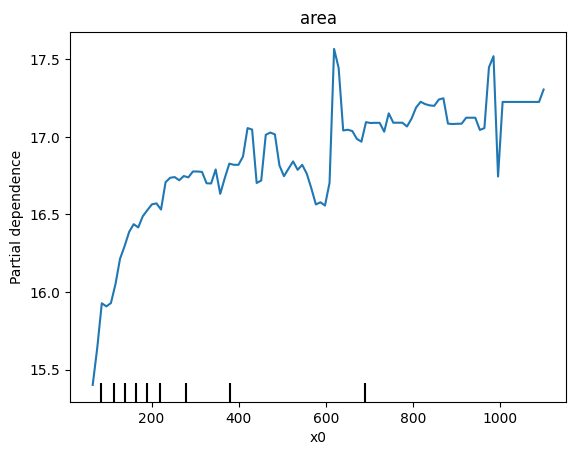

In [71]:
feature = "area"
PartialDependenceDisplay.from_estimator(reg_xgb, x_train,
                                        [feature2index[feature]] )
plt.title(feature)

Text(0.5, 1.0, '取引の事情等_調停・競売等')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/chenwuyi/Developer/SuperD/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 12398 (\N{HIRA

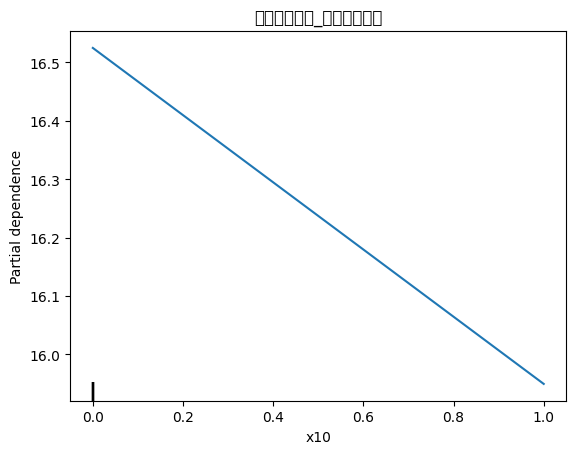

In [72]:
feature = '取引の事情等_調停・競売等'
PartialDependenceDisplay.from_estimator(reg_xgb, x_train,
                                        [feature2index[feature]] )
plt.title(feature)

# Assignment 1

# Restrict data

In [73]:
# Restrict to dates before 2019-12-31 and Tokyo, Sample 5000
cond_tokyo = (df["都道府県名"] == "東京都") & (df["date"] <= "2019-12-31")
df_train_tokyo = df.loc[cond_tokyo].sample(5000, random_state=123)

# Restrict to dates before 2019-12-31, Sample 5000 
cond_all = (df["date"] <= "2019-12-31")
df_train_all = df.loc[cond_all].sample(5000, random_state=123)

# Create test data (2020-2023)
cond_test = (df["date"] > "2019-12-31")
df_test = df.loc[cond_test].sample(5000, random_state=123)

# Extract target and features

In [81]:
# Extract features for test data
df_y_test, df_x_test = extract_target_feature(df_test)

# Extract features for Tokyo training data
df_y_train_tokyo, df_x_train_tokyo = extract_target_feature(df_train_tokyo)

# Extract features for all training data
df_y_train_all, df_x_train_all = extract_target_feature(df_train_all)

# Reshape and convert types
y_test = np.reshape(df_y_test.values, [-1]).astype(float)
x_test = df_x_test.values.astype(float)

y_train_tokyo = np.reshape(df_y_train_tokyo.values, [-1]).astype(float)
x_train_tokyo = df_x_train_tokyo.values.astype(float)

y_train_all = np.reshape(df_y_train_all.values, [-1]).astype(float)
x_train_all = df_x_train_all.values.astype(float)

# Train Tokyo Only

In [88]:
# Train model using Tokyo data
reg_xgb_tokyo = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=4,
    n_jobs=24
)

# Fit model
reg_xgb_tokyo.fit(x_train_tokyo, y_train_tokyo)

# Make predictions
y_pred_tokyo = reg_xgb_tokyo.predict(x_test)

# Calculate test error
mse_tokyo = mean_squared_error(y_test, y_pred_tokyo)
print(f"Test MSE (Tokyo model): {mse_tokyo:.4f}")

Test MSE (Tokyo model): 6.6300


findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

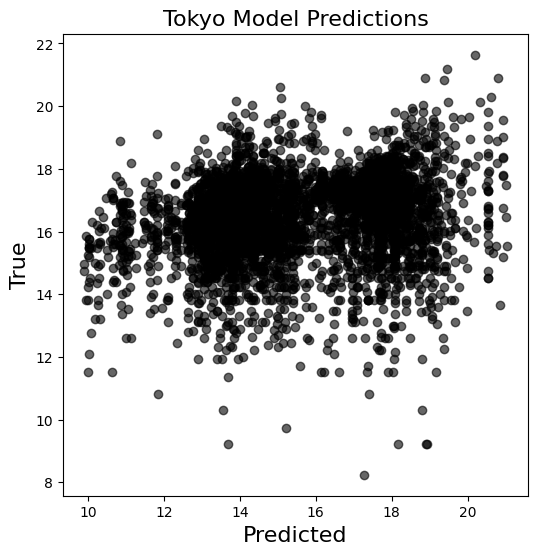

In [89]:
plt.figure(figsize=(6,6))
plt.plot(y_pred_tokyo, y_test, marker="o", linestyle="", alpha=0.6, color="black")
plt.title("Tokyo Model Predictions", size=16)
plt.xlabel("Predicted", size=16)
plt.ylabel("True", size=16)
plt.show()

In [90]:
# Test error

# Scatter plot: real vs predicted value

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

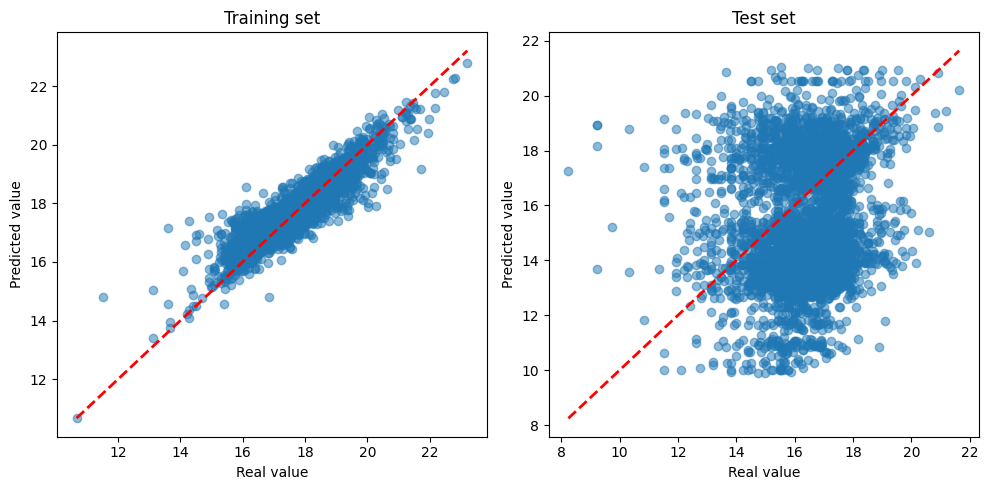

In [91]:
# Scatter plot: real vs predicted value (Tokyo)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_tokyo, reg_xgb_tokyo.predict(x_train_tokyo), alpha=0.5)
plt.plot([y_train_tokyo.min(), y_train_tokyo.max()], [y_train_tokyo.min(), y_train_tokyo.max()], 'r--', lw=2)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Training set')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tokyo, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Test set')

plt.tight_layout()
plt.show()

# Train using all past

In [92]:
# Train model using all data
reg_xgb_all = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=4,
    n_jobs=24
)

# Fit model
reg_xgb_all.fit(x_train_all, y_train_all)

# Make predictions
y_pred_all = reg_xgb_all.predict(x_test)

# Calculate test error
mse_all = mean_squared_error(y_test, y_pred_all)
print(f"Test MSE (All data model): {mse_all:.4f}")

Test MSE (All data model): 0.9922


findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

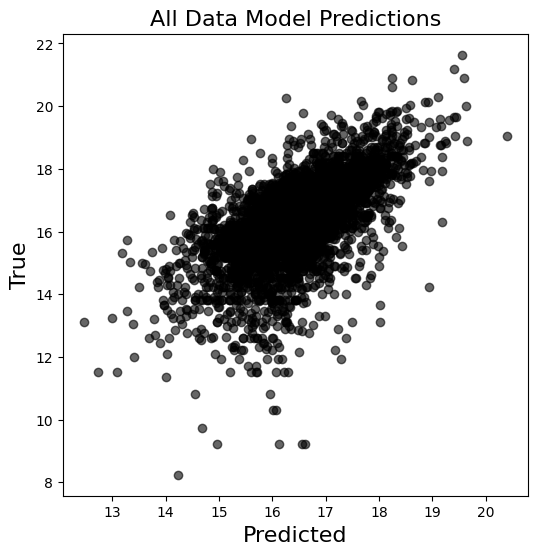

In [93]:
plt.figure(figsize=(6,6))
plt.plot(y_pred_all, y_test, marker="o", linestyle="", alpha=0.6, color="black")
plt.title("All Data Model Predictions", size=16)
plt.xlabel("Predicted", size=16)
plt.ylabel("True", size=16)
plt.show()

In [94]:
# Test error

# Scatter plot: real vs predicted value

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

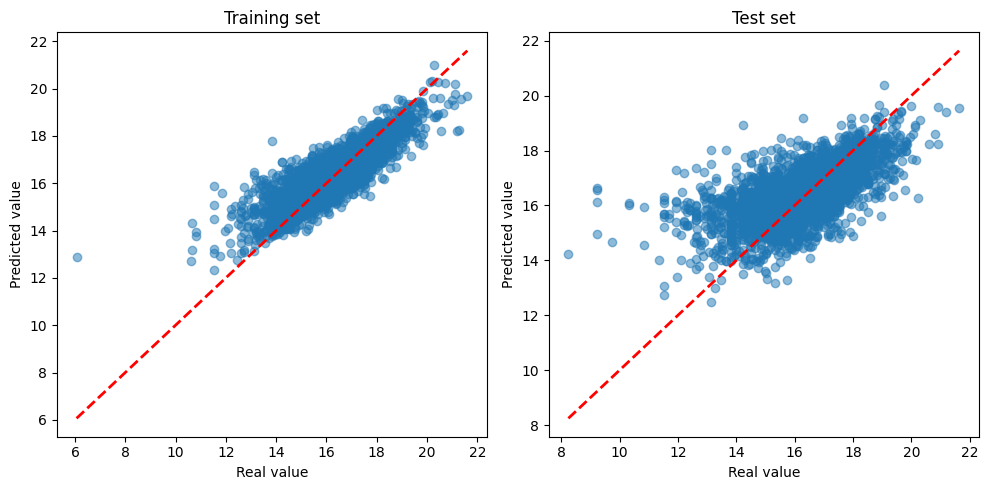

In [95]:
# Scatter plot: real vs predicted value (All)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_all, reg_xgb_all.predict(x_train_all), alpha=0.5)
plt.plot([y_train_all.min(), y_train_all.max()], [y_train_all.min(), y_train_all.max()], 'r--', lw=2)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Training set')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_all, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.title('Test set')

plt.tight_layout()
plt.show()